# Problem Set #2
### 2013-10963 Seha Lee

In [3]:
#1 finding the machine epsilon of my computer

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

eps=1.
while eps+1.!=1.:
    eps/=2
print('The value of machine epsilon is approximately',eps)

The value of machine epsilon is approximately 1.1102230246251565e-16


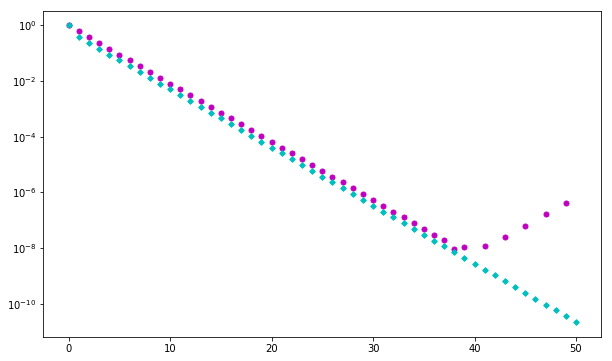

In [12]:
#2 (a)
import numpy as np
import matplotlib.pyplot as plt

phi=(np.sqrt(5)-1)/2

#calculating the n-th power of phi using succesive multiplications
def phi_a(n):
    x=1
    if n==0:
        return x
    else:
        for m in range(0,n+1):
            x=phi*x
        return x

    
#2 (b)
#calculating the n-th power of phi using the given recursion relation
def phi_b(m):
        phi_arr=[1,phi]
        if m==0:
            return 1
        elif m==1:
            return phi
        else: 
            for i in range(0,m-1):
                newphi=phi_arr[i]-phi_arr[i+1]
                phi_arr.append(newphi)
        return phi_arr[m]
    
    
#plotting
fig=plt.figure(1,figsize=(10,6))

for n in range(0,51):
   
    plt.plot(n,phi_b(n),'mo',ms=5,label='(b)')
    plt.plot(n,phi_a(n),'cD',ms=4,label='(a)')
    plt.yscale('log')
    

#2 (b) - proof that the equation (1) is the same as the equation (2)
$$ \phi ={\sqrt5-1 \over 2}  $$

$$ {(\phi + {1 \over 2} )^2} = {5 \over 4} $$

$$ \phi^2 + \phi -1 = 0 $$

$$ \phi^{n+1} = \phi^{n-1}-\phi^n $$

 #2 (c) The round-off error occurs at the subtracting calculation of equation(2), and the accumulated error shows its effect on values of large n.

 #3 (a) derivation of Wien's Law
$$ 2hc^2 = A$$ 
$${{hc} \over {kT}} = B $$
 Constants A and B are set as above for convenience. Then the Planck function becomes:
$$ B_{\lambda}= {A \over {{\lambda^5} (e^{B \over \lambda}-1)}} $$
solving for $$ {dB \over d\lambda} = 0$$ we get $$ {xe^x \over {e^x -1}}=5 $$ where $$x= {B \over \lambda}$$
 now we calculate x using Newton-Raphson method

In [3]:
#3 (a) actual calculation (derivation is given above)

h=6.626*10**(-34)
k=1.381*10**(-23)
c=2.998*10**8
T=10**4

A=2*h*(c**2)
B=h*c/(k*T)

#using Newton-Raphson method to calculate x 
x=5
TOL=10**(-15)
loop=0
err=1

def func(x):
    f=(x-5)*np.exp(x)+5
    df=(x-4)*np.exp(x)
    return f,df

while err>=TOL:
    loop+=1
    f,df=func(x)
    err=np.abs(f/df)
    x-=f/df
    print('loop=',loop,'x=',x,'error=',err)
    
factor=h*c/(k*x)

print ('Wien\'s displacement law : The wavelength[m] is propotional to the inverse of temperture[K] by the factor of',factor,'[m*K]')

loop= 1 x= 4.966310265004573 error= 0.03368973499542734
loop= 2 x= 4.965115686301458 error= 0.0011945787031143824
loop= 3 x= 4.96511423174643 error= 1.4545550279972886e-06
loop= 4 x= 4.965114231744276 error= 2.1535505638659888e-12
loop= 5 x= 4.965114231744276 error= 2.8894308000260734e-16
Wien's displacement law : The wavelength[m] is propotional to the inverse of temperture[K] by the factor of 0.0028970776571844666 [m*K]


In [16]:
#3 (b)
h=6.626*10**(-34)
k=1.381*10**(-23)
c=2.998*10**8
T=10**4

A=2*h*(c**2)
B=h*c/(k*T)

#using Wien's law to get the maximum value of wavelenth

print ('The maximum wavelength is', factor/T, 'm')

The maximum wavelength is 2.897077657184467e-07 m


In [17]:
#3 (b) continued
def func(x):
    f=A/((x**5)*(np.exp(B/x)-1))-10**13
    return f

#bisection method 

print('wavelength1')
a=1*10**(-9)
b=2.897077657184467*10**(-7)
TOL=10**(-12)
loop=0
err=1


while err>=TOL:
    loop+=1
    fa=func(a)
    fb=func(b)
    c=(a+b)/2
    fc=func(c)
    err=np.abs(c-b)
    print('loop=',loop,'error=',err,'a=',a,'b=',b,'c',c)
    if (fa*fc<=0):
        b=c
    else:
        a=c
        
print('wavelength2')
a=2.897077657184467*10**(-7)
b=10**(-5)
TOL=10**(-12)
loop=0
err=1

while err>=TOL:
    loop+=1
    fa=func(a)
    fb=func(b)
    c=(a+b)/2
    fc=func(c)
    err=np.abs(c-b)
    print('loop=',loop,'error=',err,'a=',a,'b=',b,'c',c)
    if (fa*fc<=0):
        b=c
    else:
        a=c
    
   

wavelength1
loop= 1 error= 1.4435388285922333e-07 a= 1e-09 b= 2.897077657184467e-07 c 1.4535388285922335e-07
loop= 2 error= 7.217694142961168e-08 a= 1e-09 b= 1.4535388285922335e-07 c 7.317694142961167e-08
loop= 3 error= 3.6088470714805846e-08 a= 7.317694142961167e-08 b= 1.4535388285922335e-07 c 1.0926541214441751e-07
loop= 4 error= 1.804423535740291e-08 a= 7.317694142961167e-08 b= 1.0926541214441751e-07 c 9.12211767870146e-08
loop= 5 error= 9.022117678701455e-09 a= 9.12211767870146e-08 b= 1.0926541214441751e-07 c 1.0024329446571605e-07
loop= 6 error= 4.511058839350734e-09 a= 1.0024329446571605e-07 b= 1.0926541214441751e-07 c 1.0475435330506677e-07
loop= 7 error= 2.255529419675367e-09 a= 1.0024329446571605e-07 b= 1.0475435330506677e-07 c 1.0249882388539141e-07
loop= 8 error= 1.1277647098376835e-09 a= 1.0249882388539141e-07 b= 1.0475435330506677e-07 c 1.0362658859522909e-07
loop= 9 error= 5.638823549188484e-10 a= 1.0362658859522909e-07 b= 1.0475435330506677e-07 c 1.0419047095014793e-07
l

The two corresponding wavelengths are 1.0443551748133824e-07[m] and 1.4889455393642589e-06[m]

#3(c)
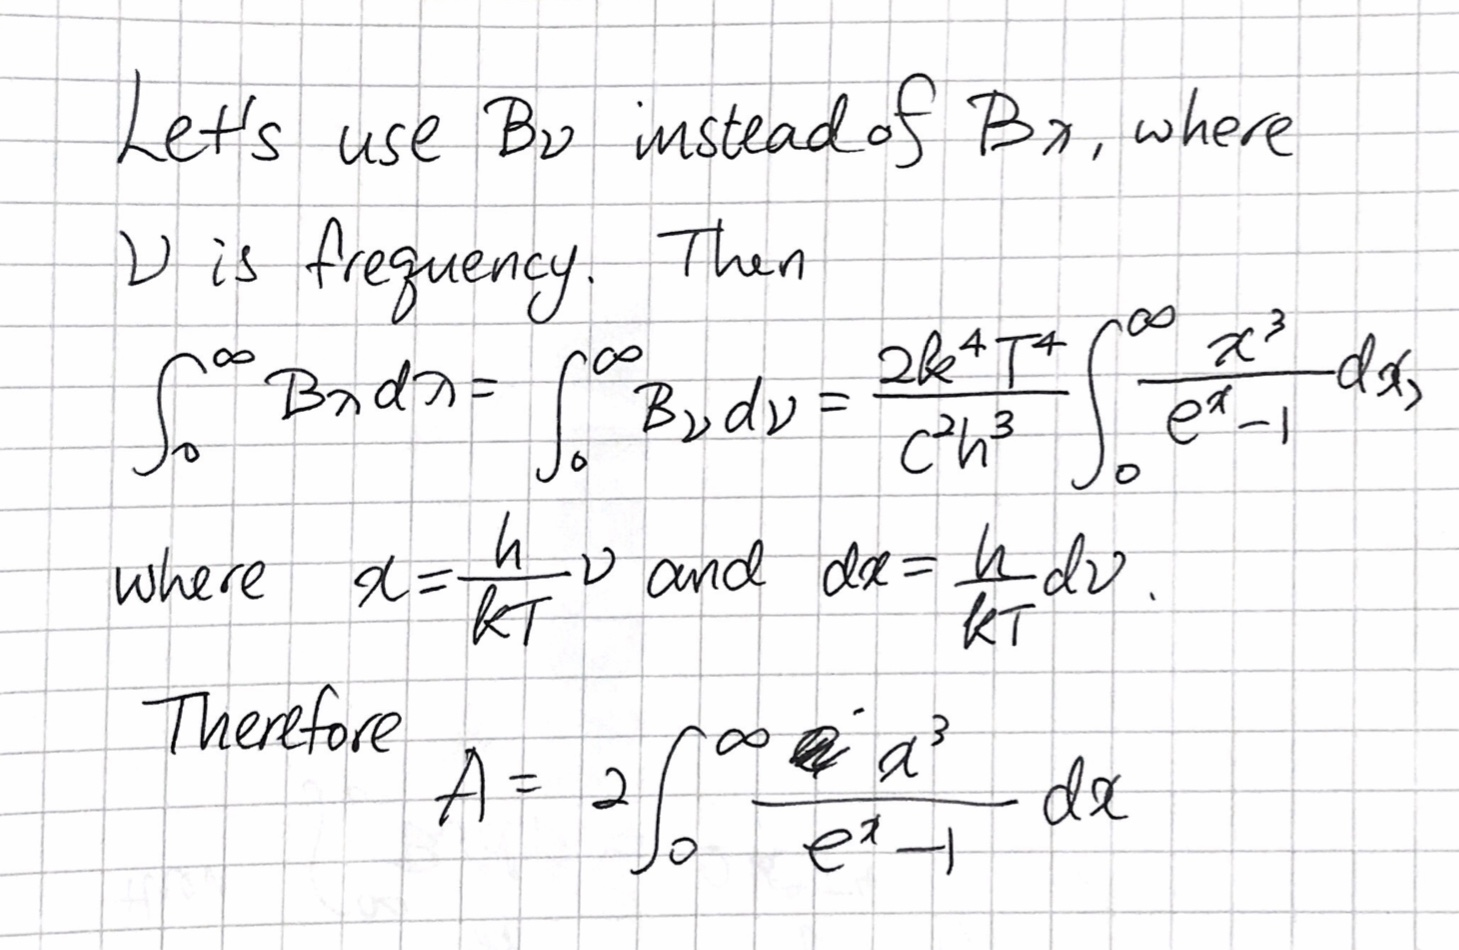

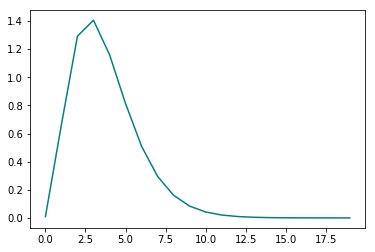

In [6]:
#3 (c) continued - observing the function

def func_orig(x): #the original fucntion
    return x**3/(np.exp(x)-1)

n=np.arange(0.1,20.1)
b=np.vectorize(func_orig)
plt.plot(b(n),'teal')

In [7]:
#3(c) continued - integrating using Gaussian quadrature

a= eps
b= 200
#limiting the interval; from the graph above it is shown that the function converges after x~15


def e(x):
    return np.exp(x)

def funcB(x):
    return (x**3)*(e(-x)+e(-2*x)+e(-3*x)+e(-4*x)+e(-5*x)+e(-6*x)+e(-7*x)+e(-8*x)+e(-9*x)+e(-10*x)+e(-11*x)+e(-12*x))
#using the expansion of the original function
                   
i=0
while i<11:
    i+=1
    deg=2**i
    x,w=np.polynomial.legendre.leggauss(deg) #nodes and weights
    sum=0
    for j in range (deg):
        sum+=w[j]*funcB(0.5*(a+b+x[j]*(b-a)))
    sum*=(0.5*b-0.5*a)
    print('nodes=',deg, ', sum=',sum)

print('true value=',np.pi**4/15, 'error=', 1-sum/(np.pi**4/15))
print('A=',2*sum)

nodes= 2 , sum= 3.330406175884128e-12
nodes= 4 , sum= 0.08677431416809714
nodes= 8 , sum= 12.181311386630393
nodes= 16 , sum= 5.91567070898515
nodes= 32 , sum= 6.492337643869697
nodes= 64 , sum= 6.49300205541546
nodes= 128 , sum= 6.49291866090485
nodes= 256 , sum= 6.492918660887524
nodes= 512 , sum= 6.492918660886956
nodes= 1024 , sum= 6.492918660887577
nodes= 2048 , sum= 6.492918660888025
true value= 6.493939402266828 error= 0.00015718369322126335
A= 12.98583732177605


when t is 182 days:


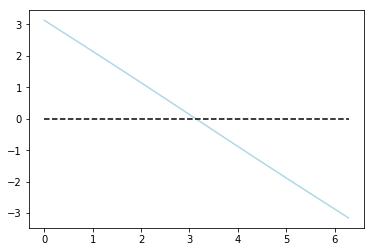

when t is 273 days:


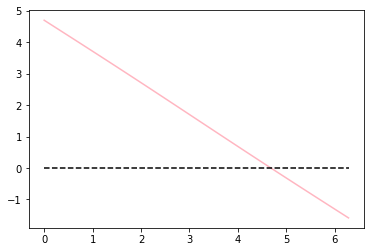

In [8]:
#4 (a) plotting

    
P=365.25635 
a=1.496*(10**8)
e=0.0167
b=a*np.sqrt(1-e**2)
E=np.pi
x=a*np.cos(E)
y=b*np.sin(E)


print('when t is 182 days:')

t=182
X=np.linspace(0,2*3.1416,num=100)
Y=e*np.sin(X)+(2*np.pi*t/P)-X
Z=X-X      #indicates the x-axis
plt.plot(X,Y,'lightblue')
plt.plot(X,Z,'k--')
plt.show()    

print('when t is 273 days:')

t=273
X=np.linspace(0,2*3.1416,num=100)
Y=e*np.sin(X)+(2*np.pi*t/P)-X
Z=X-X      #indicates the x-axis
plt.plot(X,Y,'lightpink')
plt.plot(X,Z,'k--')
plt.show()  


##### From the graph the ranges of roots can be expected.

In [9]:
#4 (a) bisection method 

P=365.25635 
a=1.496*(10**8)
e=0.0167
b=a*np.sqrt(1-e**2)
E=np.pi



print('when t is 182 days:')

t=182

A=3.
B=4.
TOL=10**(-10)
loop=0
err=1

def func(E):
    f=e*np.sin(E)+(2*np.pi*t/P)-E
    return f

while (err>=TOL):
    loop+=1
    fa=func(A)
    fb=func(B)
    c=(A+B)/2
    fc=func(c)
    err=np.abs(c-B)
    if (fa*fc<=0):
        B=c
    else:
        A=c
print('loop=',loop,'error=',err,A,B,c)

x=a*np.cos(c)
y=b*np.sin(c)
print("x=",x,"y=",y)

print('when t is 273 days:')

t=273

A=4.
B=5.
TOL=10**(-10)
loop=0
err=1

def func(E):
    f=e*np.sin(E)+(2*np.pi*t/P)-E
    return f

while (err>=TOL):
    loop+=1
    fa=func(A)
    fb=func(B)
    c=(A+B)/2
    fc=func(c)
    err=np.abs(c-B)
    if (fa*fc<=0):
        B=c
    else:
        A=c
print('loop=',loop,'error=',err,A,B,c)
x=a*np.cos(c)
y=b*np.sin(c)
print("x=",x,"y=",y)

when t is 182 days:
loop= 34 error= 5.820766091346741e-11 3.13096420065267 3.1309642007108778 3.13096420065267
x= -149591550.37145707 y= 1589764.892642314
when t is 273 days:
loop= 34 error= 5.820766091346741e-11 4.679489100526553 4.67948910058476 4.679489100526553
x= -4920934.176417339 y= -149498192.489059


In [10]:
#4 (a) Newton method

P=365.25635 
a=1.496*10**8
e=0.0167
b=a*np.sqrt(1-e**2)
E=np.pi
x=a*np.cos(E)
y=b*np.sin(E)

def func(E):
    f=e*np.sin(E)+(2*np.pi*t/P)-E
    df=e*np.cos(E)-1
    return f,df


print('when t is 182 days:')
t=182
A=3
TOL=10**(-10)
loop=0
err=1

while err>=TOL:
    loop+=1
    f,df=func(A)
    err=np.abs(f/df)
    A-=f/df
print('loop=',loop,'error=',err,A)
x=a*np.cos(A)
y=b*np.sin(A)
print("x=",x,"y=",y)

print('when t is 273 days:')
t=273
A=4
TOL=10**(-10)
loop=0
err=1

while err>=TOL:
    loop+=1
    f,df=func(A)
    err=np.abs(f/df)
    A-=f/df
print('loop=',loop,'error=',err,A)
x=a*np.cos(A)
y=b*np.sin(A)
print("x=",x,"y=",y)

when t is 182 days:
loop= 3 error= 1.659821543268742e-14 3.130964200681736
x= -149591550.37150326 y= 1589764.88829488
when t is 273 days:
loop= 4 error= 0.0 4.679489100532153
x= -4920934.175580038 y= -149498192.48908657


In [16]:
#4 (a) fixed-iteration method

P=365.25635 
a=1.496*10**8
e=0.0167
b=a*np.sqrt(1-e**2)
E=np.pi
x=a*np.cos(E)
y=b*np.sin(E)

def func(E):
    f=e*np.sin(E)+(2*np.pi*t/P)-E
    return f


print('when t is 182 days:')
t=182
TOL=10**(-10)
err=1
x1=4
loop=1

while (err>TOL):
    loop +=1
    x2=func(x1)
    err=np.abs(x1-x2)
    x1=x2
    if(loop > 1000): 
        break

print('loop=',loop,'error=',err,x2)
x=a*np.cos(x2)
y=b*np.sin(x2)
print("x=",x,"y=",y)

print('when t is 273 days:')   
t=273
TOL=10**(-10)
err=1
x1=4
loop=1

while (err>TOL):
    loop +=1
    x2=func(x1)
    err=np.abs(x1-x2)
    x1=x2
    if(loop > 1000): 
        break
print('loop=',loop,'error=',err,x2)
x=a*np.cos(x2)
y=b*np.sin(x2)
print("x=",x,"y=",y)
    



when t is 182 days:
loop= 1001 error= 4.618209677079745 3.868810179178489
x= -111755248.62724158 y= -99439257.46080525
when t is 273 days:
loop= 1001 error= 6.283154848509733 5.483680591881076
x= 104280463.13872294 y= -107249877.2509707


when t is 182 days:


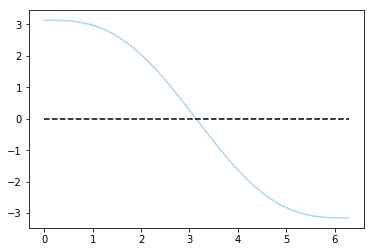

when t is 273 days:


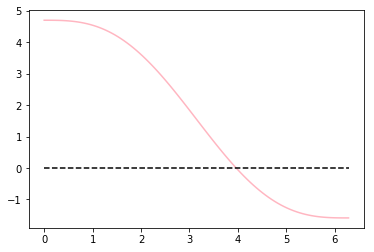

In [11]:
#4(b) plotting

    
P=365.25635 
a=1.496*(10**8)
e=0.99999
b=a*np.sqrt(1-e**2)
E=np.pi
x=a*np.cos(E)
y=b*np.sin(E)


print('when t is 182 days:')

t=182
X=np.linspace(0,2*3.1416,num=100)
Y=e*np.sin(X)+(2*np.pi*t/P)-X
Z=X-X      #indicates the x-axis
plt.plot(X,Y,'lightblue')
plt.plot(X,Z,'k--')
plt.show()    

print('when t is 273 days:')

t=273
X=np.linspace(0,2*3.1416,num=100)
Y=e*np.sin(X)+(2*np.pi*t/P)-X
Z=X-X      #indicates the x-axis
plt.plot(X,Y,'lightpink')
plt.plot(X,Z,'k--')
plt.show()  



In [19]:
#4 (b) bisection method 

P=365.25635 
a=1.496*(10**8)
e=0.99999
b=a*np.sqrt(1-e**2)
E=np.pi



print('when t is 182 days:')

t=182

A=3.
B=4.
TOL=10**(-10)
loop=0
err=1

def func(E):
    f=e*np.sin(E)+(2*np.pi*t/P)-E
    return f

while (err>=TOL):
    loop+=1
    fa=func(A)
    fb=func(B)
    c=(A+B)/2
    fc=func(c)
    err=np.abs(c-B)
    if (fa*fc<=0):
        B=c
    else:
        A=c
print('loop=',loop,'error=',err,A,B,c)

x=a*np.cos(c)
y=b*np.sin(c)
print("x=",x,"y=",y)

print('when t is 273 days:')

t=273

A=3.
B=5.
TOL=10**(-10)
loop=0
err=1

def func(E):
    f=e*np.sin(E)+(2*np.pi*t/P)-E
    return f

while (err>=TOL):
    loop+=1
    fa=func(A)
    fb=func(B)
    c=(A+B)/2
    fc=func(c)
    err=np.abs(c-B)
    if (fa*fc<=0):
        B=c
    else:
        A=c
print('loop=',loop,'error=',err,A,B,c)
x=a*np.cos(c)
y=b*np.sin(c)
print("x=",x,"y=",y)

when t is 182 days:
loop= 34 error= 5.820766091346741e-11 3.1361896410235204 3.136189641081728 3.1361896410235204
x= -149597816.40296167 y= 3614.759187355053
when t is 273 days:
loop= 35 error= 5.820766091346741e-11 3.9636437776498497 3.9636437777080573 3.9636437777080573
x= -101835727.31970719 y= -490093.5541911036


In [20]:
#4 (b) Newton method

P=365.25635 
a=1.496*10**8
e=0.99999
b=a*np.sqrt(1-e**2)
E=np.pi
x=a*np.cos(E)
y=b*np.sin(E)

def func(E):
    f=e*np.sin(E)+(2*np.pi*t/P)-E
    df=e*np.cos(E)-1
    return f,df


print('when t is 182 days:')
t=182
A=3
TOL=10**(-10)
loop=0
err=1

while err>=TOL:
    loop+=1
    f,df=func(A)
    err=np.abs(f/df)
    A-=f/df
print('loop=',loop,'error=',err,A)
x=a*np.cos(A)
y=b*np.sin(A)
print("x=",x,"y=",y)

print('when t is 273 days:')
t=273
A=3
TOL=10**(-10)
loop=0
err=1

while err>=TOL:
    loop+=1
    f,df=func(A)
    err=np.abs(f/df)
    A-=f/df
print('loop=',loop,'error=',err,A)
x=a*np.cos(A)
y=b*np.sin(A)
print("x=",x,"y=",y)

when t is 182 days:
loop= 4 error= 0.0 3.1361896410659678
x= -149597816.402996 y= 3614.759158956904
when t is 273 days:
loop= 5 error= 2.6422662991153474e-16 3.9636437776514937
x= -101835727.32590592 y= -490093.55416534323


In [17]:
#4 (b) fixed-iteration method

P=365.25635 
a=1.496*10**8
e=0.99999
b=a*np.sqrt(1-e**2)
E=np.pi
x=a*np.cos(E)
y=b*np.sin(E)

def func(E):
    f=e*np.sin(E)+(2*np.pi*t/P)-E
    return f


print('when t is 182 days:')
t=182
TOL=10**(-10)
err=1
x1=4
loop=1

while (err>TOL):
    loop +=1
    x2=func(x1)
    err=np.abs(x1-x2)
    x1=x2
    if(loop > 1000): 
        break

print('loop=',loop,'error=',err,x2)
x=a*np.cos(x2)
y=b*np.sin(x2)
print("x=",x,"y=",y)

print('when t is 273 days:')

t=273
TOL=10**(-10)
err=1
x1=4
loop=1

while (err>TOL):
    loop +=1
    x2=func(x1)
    err=np.abs(x1-x2)
    x1=x2
    if(loop > 1000): 
        break
print('loop=',loop,'error=',err,x2)
x=a*np.cos(x2)
y=b*np.sin(x2)
print("x=",x,"y=",y)

when t is 182 days:
loop= 1001 error= 3.119980127376482 3.1307863904831374
x= -149591265.29089007 y= 7229.572053438662
when t is 273 days:
loop= 1001 error= 6.283185307179585 5.0119551618777525
x= 44147818.13802954 y= -639234.354488231
